# Digit Recognizer
Learn computer vision fundamentals with the famous MNIST data

Computer Vision Fundamentals

# Data Set and Problem Statement

Link: https://www.kaggle.com/competitions/digit-recognizer/data

Image data is typically stored as a collection of pixels, where each pixel represents a single point in the image. The arrangement of pixels forms a grid, and each pixel contains information about the color or intensity of that point.

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user.(Supervised learning).

The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

000 001 002 003 ... 026 027

028 029 030 031 ... 054 055

056 057 058 059 ... 082 083

 |   |   |   |  ...  |   |
 
728 729 730 731 ... 754 755

756 757 758 759 ... 782 783 

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

ImageId,Label

1,3

2,7

3,8 

(27997 more lines)

# Loading the datasets

In [22]:
import pandas as pd


In [23]:
train_data = pd.read_csv("/Users/rajatchauhan/Desktop/Machine Learning Notes/Datasets/Handwritten Image Classifier/train.csv")
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We see the first column is the label column telling what the image had, which number.

Let us see how many unique values this label column have, just to understand the data better

In [24]:
train_data['label'].unique()


array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

So, we just have 10 classes classifier problem

Let us now also see the possible pixel values which is an integer between 0 and 255, inclusive.

In [25]:
train_data["pixel100"].unique()


array([  0,  51, 255, 132,  53, 150, 139, 233,  59, 178, 227, 253,  98,
       164, 191, 254, 192,  69, 206, 156,  56, 185,  86, 180,  62,  48,
       143,  29, 140,  11,  41,  22, 215, 114, 122, 184,  55,  13,  85,
       210, 216, 117,  20, 234,  45, 189, 128, 163, 245, 145,  14, 218,
       131, 226,  49,  76, 174, 165,  91,  12,  99, 228, 157, 252, 195,
        47, 240,  28, 146,   5, 118, 250, 204, 221,  27, 147, 116, 142,
        93, 160, 105,  32,   1,  68, 159, 224, 239,   2,  64,  63, 194,
       220,  97,  26,  92,   8, 113,  66,  19, 236,  96,  16,  75, 205,
       168,  15, 230,  50,   7,   3,  25, 104,  65,  84,  87, 237, 102,
       244,  60, 152, 181,  30, 249,  57, 247, 190, 136, 198, 241, 246,
       213, 208,  40, 112, 225, 153, 232, 170,  42, 251,  37, 154, 193,
       197,  24, 169, 229, 248,  17,  79, 242, 211,  88, 148, 212, 175,
       222, 202,  39,  31,  90,  81,  95, 207, 162, 129,  38,  46, 109,
       149, 138, 127, 223,  35,   6, 176, 119, 151, 115, 130, 10

Perfect let us train our model using this data now

# Defining features(X) and label(y) variable

In [41]:
X = train_data.iloc[:,1:].values
X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
y = train_data["label"].values
y


array([1, 0, 1, ..., 7, 6, 9])


Let us divide data into train test split to see how well it works before actually going for the predictions of unseen data


In [43]:
from sklearn.model_selection import train_test_split


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 9)


In [45]:
X_train


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Using Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier


In [47]:
clf = DecisionTreeClassifier()


In [48]:
clf.fit(X_train, y_train)


DecisionTreeClassifier()

Let us use the classifier to make the predictions

In [49]:
y_pred = clf.predict(X_test)
y_pred


array([8, 1, 6, ..., 1, 1, 9])

In [50]:
y_test


array([8, 1, 6, ..., 1, 1, 9])

Let us see the accuracy score of the model

In [51]:
from sklearn.metrics import accuracy_score


In [52]:
accuracy_score(y_test,y_pred)


0.8475

So model is performing around 85% with the training test data.

Let us see things visually

In [53]:
import matplotlib.pyplot as plt

We can use reshape command to make it a 28 by 28 grid using imshow method

Display data as an image, i.e., on a 2D regular raster.

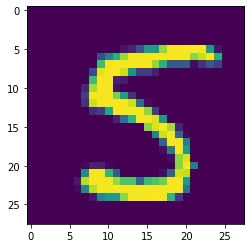

In [54]:
plt.imshow(X_test[100].reshape(28,28))

This looks like a 5, Let us see the prediction for this datapoint by the Decision Tree Classifier

In [60]:
clf.predict(X_test[100].reshape(1,784))

array([5])

Perfect so the computer vision is not so bad.

# Making predictions for the unseen data

In [62]:
unseen_data = pd.read_csv("/Users/rajatchauhan/Desktop/Machine Learning Notes/Datasets/Handwritten Image Classifier/test.csv")
unseen_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We use can use the classifier that we trained to make the predictions for this data set

In [63]:
y_pred_on_unseen_data = clf.predict(unseen_data)
y_pred_on_unseen_data


/Users/rajatchauhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([2, 0, 9, ..., 3, 9, 2])

This is a good problem to work on, we can use and test various algorithms and see which one works the best for us.